<a href="https://colab.research.google.com/github/kilchinskiy/Hw2.3.ipynb/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#1 Прочитайте csv файл (використовуйте функцію read_csv)
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/bestsellers with categories.csv.csv")
#2 Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
#3 Виведіть розміри датасету (використовуйте атрибут shape)

df.shape

#4 Відповідь: Про скільки книг зберігає дані датасет? 557 Книга


(550, 7)

In [20]:
#5 Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style)

df.columns = [
    'name',
    'author',
    'user_rating',
    'reviews',
    'price',
    'year',
    'genre'
]

df.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [22]:
# Первинне дослідження даних
#6 Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

missing_values = df.isna().sum()
missing_values

# Відповідь: Чи є в якихось змінних пропуски? (Hі)

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


In [23]:
#7 Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

df['genre'].unique()

#Відповідь: Які є унікальні жанри? немає

array(['Non Fiction', 'Fiction'], dtype=object)

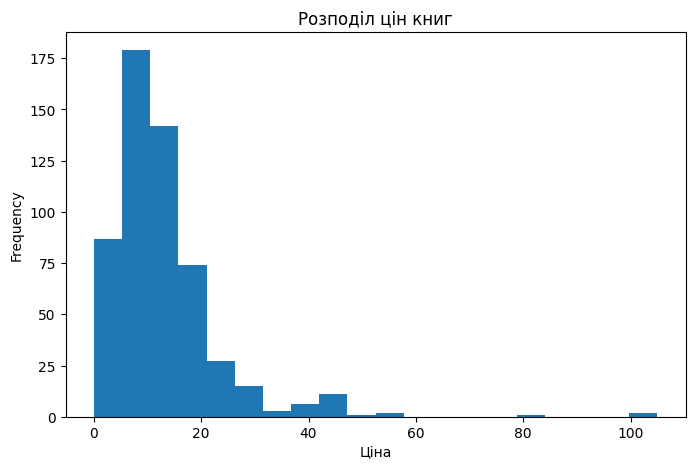

In [24]:
#8 Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, figsize=(8,5))
plt.title("Розподіл цін книг")
plt.xlabel("Ціна")
plt.show()

In [25]:
#9 Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

max_price, min_price, mean_price, median_price

#Відповідь: Максимальна ціна? 105
#Відповідь: Мінімальна ціна? 0
#Відповідь: Середня ціна? 13.1
#Відповідь: Медіанна ціна? 11.0


(105, 0, np.float64(13.1), 11.0)

In [26]:
# Пошук та сортування даних
#10 Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

max_rating = df['user_rating'].max()
max_rating

4.9

In [27]:
#11 Bідповідь: Скільки книг мають такий рейтинг? Відповідь: 52

count_max_rating = df[df['user_rating'] == max_rating].shape[0]
count_max_rating

52

In [28]:
#12 Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

df.loc[df['reviews'].idxmax(), 'name']

'Where the Crawdads Sing'

In [29]:
#13 З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: ublication Manual of the American Psychological Association, 6th Edition

df_2015 = df[df['year'] == 2015]

df_2015.loc[df_2015['price'].idxmax(), 'name']

'Publication Manual of the American Psychological Association, 6th Edition'

In [30]:
#14 Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
fiction_2010


20

In [31]:
#15 Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

books_49 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
books_49

1

In [35]:
 #16 насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

cheap_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

cheap_2015.tail(1)['name']

#17 Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

,name
253,Old School (Diary of a Wimpy Kid #10)


In [36]:
#18 Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
# Відповідь: Максимальна ціна для жанру Fiction: 82
# Відповідь: Мінімальна ціна для жанру Fiction: 0
# Відповідь: Максимальна ціна для жанру Non Fiction: 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: 0

price_stats = df.groupby('genre')['price'].agg(['max','min'])
price_stats



,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


In [39]:
#19 Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

author_books = df.groupby('author')['name'].agg(['count'])
author_books.head()



,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


In [ ]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248.1)

author_books.shape

In [40]:
# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney

top_author = author_books['count'].idxmax()
top_author

'Jeff Kinney'

In [41]:
# Відповідь: Скільки книг цього автора? Відповідь: 12

author_books['count'].max()

12

In [44]:
#20 Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні


author_rating = df.groupby('author')['user_rating'].agg(['mean'])
author_rating.head()

,mean
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


In [47]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:Donna Tartt


min_rating_author = author_rating['mean'].idxmin()
min_rating_author



'Donna Tartt'

In [48]:
# Відповідь: Який у цього автора середній рейтинг? Відповідь:3.9

author_rating['mean'].min()

3.9

In [49]:
#21 З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

author_info = pd.concat([author_books, author_rating], axis=1)
author_info.head()

,count,mean
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


In [50]:
#22 Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

author_sorted = author_info.sort_values(by=['count','mean'])
author_sorted.head()

# Відповідь: Який автор перший у списку? Muriel Barbery

,count,mean
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


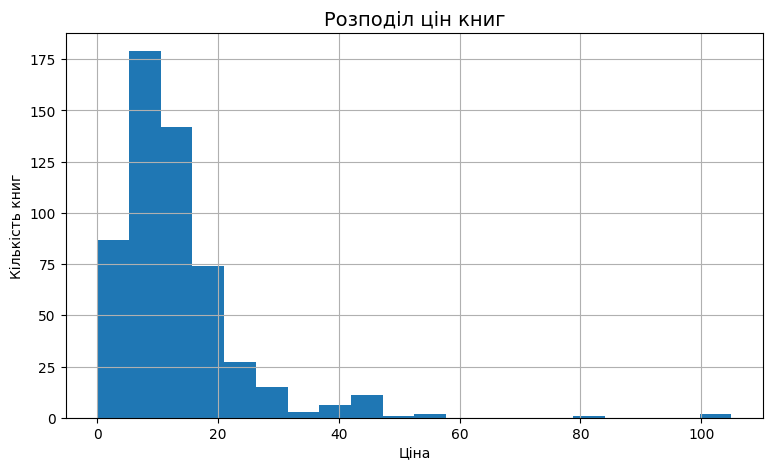

In [53]:
#23 додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

# Розподіл цін
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.hist(df['price'], bins=20)
plt.title("Розподіл цін книг", fontsize=14)
plt.xlabel("Ціна")
plt.ylabel("Кількість книг")
plt.grid(True)

plt.show()

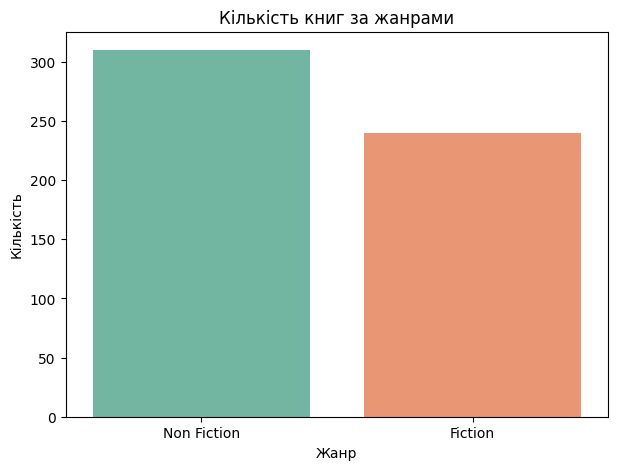

In [63]:
# Кількість книг по жанрах
import seaborn as sns

plt.figure(figsize=(7,5))

sns.countplot(
    data=df,
    x='genre',
    hue='genre',
    palette='Set2',
    legend=False
)

plt.title("Кількість книг за жанрами")
plt.xlabel("Жанр")
plt.ylabel("Кількість")

plt.show()

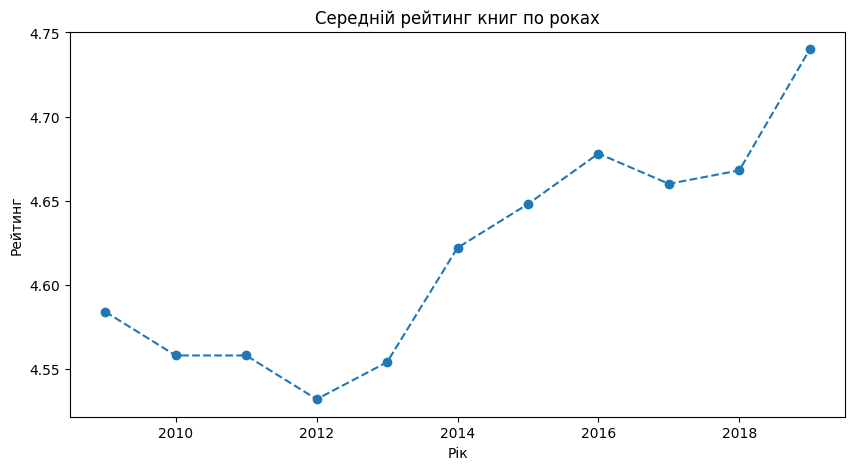

In [56]:
# Середній рейтинг по роках

plt.figure(figsize=(10,5))

df.groupby('year')['user_rating'].mean().plot(
    marker='o',
    linestyle='--'
)

plt.title("Середній рейтинг книг по роках")
plt.xlabel("Рік")
plt.ylabel("Рейтинг")

plt.show()

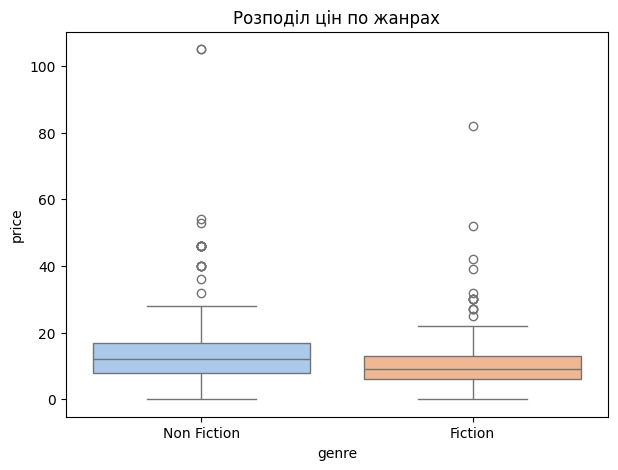

In [60]:
# Розподіл цін по жанрах

plt.figure(figsize=(7,5))

sns.boxplot(
    data=df,
    x='genre',
    y='price',
    hue='genre',
    palette='pastel',
    legend=False
)

plt.title("Розподіл цін по жанрах")

plt.show()

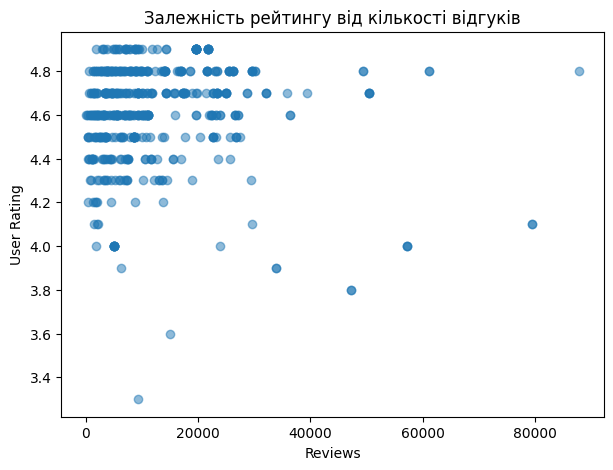

In [58]:
# Залежність рейтингу від кількості відгуків

plt.figure(figsize=(7,5))

plt.scatter(
    df['reviews'],
    df['user_rating'],
    alpha=0.5
)

plt.title("Залежність рейтингу від кількості відгуків")
plt.xlabel("Reviews")
plt.ylabel("User Rating")

plt.show()